In [2]:
!pip install EMD-signal
!pip install vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PyEMD as pe
from vnstock import *

Observations:  1629
            Open  High   Low  Close   Volume Ticker
Time                                               
2017-06-02  3230  3330  3200   3280   411631    VND
2017-06-05  3320  3370  3270   3280   671582    VND
2017-06-06  3280  3320  3270   3320   174560    VND
2017-06-07  3320  3610  3320   3590  2332950    VND
2017-06-08  3640  3640  3510   3540   467477    VND
2017-06-09  3520  3660  3520   3560   726174    VND


<Axes: xlabel='Time'>

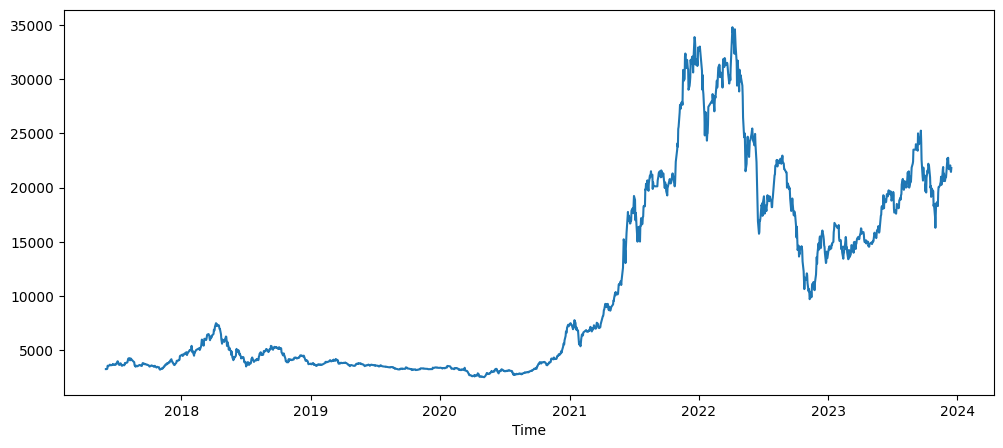

In [4]:
# Import data
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
print(pd.DataFrame(VND.head(6)))
train_dates = VND.index
plt.figure(figsize=(12, 5))
VND["Close"].plot()

In [5]:
VND = VND.reset_index(drop = True)
df = VND['Close']
df

0        3280
1        3280
2        3320
3        3590
4        3540
        ...  
1624    21950
1625    22050
1626    21600
1627    21450
1628    21800
Name: Close, Length: 1629, dtype: int64

In [6]:
from PyEMD import EMD, CEEMDAN

In [7]:
#ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)
ceemdan = CEEMDAN(epsilon=0.005, range_thr = 0.005)
ceemdan.noise_seed(seed = 1)
cIMFs = ceemdan.ceemdan(S=np.array(df.values), T= np.array(df.index))

In [8]:
pd.DataFrame(cIMFs.T, columns = ["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7
0,-45.793487,-55.077449,-60.721015,-87.251699,73.004286,-657.359030,4113.198394
1,-29.394342,-64.807423,-69.000897,-89.792806,88.123854,-665.361652,4110.233265
2,-60.521464,-25.706900,-48.380470,-83.669122,104.082246,-673.082455,4107.278164
3,85.227708,41.416746,-10.767431,-70.509538,120.816487,-680.517043,4104.333071
4,-21.401641,33.995165,27.980772,-52.558462,138.247220,-687.661019,4101.397965
...,...,...,...,...,...,...,...
1624,164.330695,-553.214054,-42.129070,3030.530073,-2309.543674,4278.001644,17382.024387
1625,288.306510,-518.767780,-109.073546,3047.823428,-2309.810340,4272.124884,17379.396845
1626,-167.023518,-468.526841,-126.661472,3026.110174,-2306.862019,4266.099938,17376.863738
1627,-322.859110,-437.981109,-86.328036,2963.576313,-2300.770975,4259.938107,17374.424811


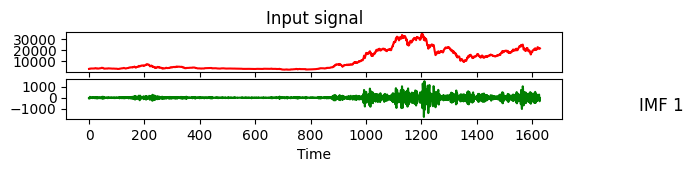

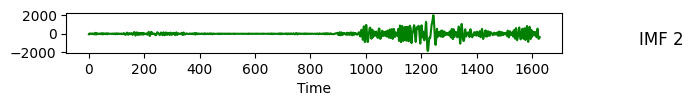

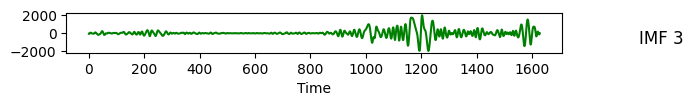

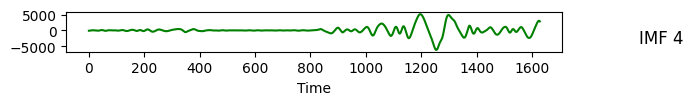

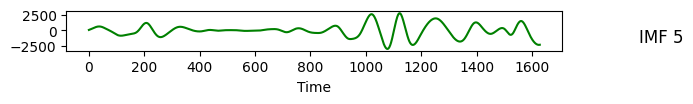

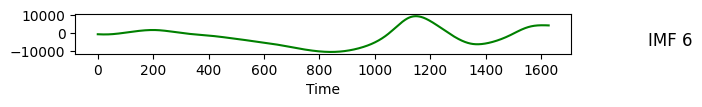

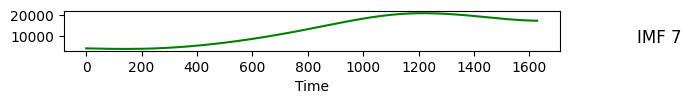

In [9]:
N = cIMFs.shape[0]+1
# Plot results
plt.subplot(N,1,1)
plt.plot(df.index, df.values, 'r')
plt.title("Input signal")
plt.xlabel("Time")

for n, imf in enumerate(cIMFs):
  plt.subplot(N,1,n+2)
  plt.plot(df.index, imf, 'g')
  plt.title("IMF "+str(n+1), x=1.2, y = 0)
  plt.xlabel("Time")
  plt.show()

In [10]:
# Tính residue
scIMF = cIMFs.sum(axis = 0).reshape(-1, 1)
residue = (np.array(df)-cIMFs.sum(axis = 0)).reshape(-1,1)

print("sIMF:", scIMF.shape)
print("Residue:", residue.shape)

sIMF: (1629, 1)
Residue: (1629, 1)


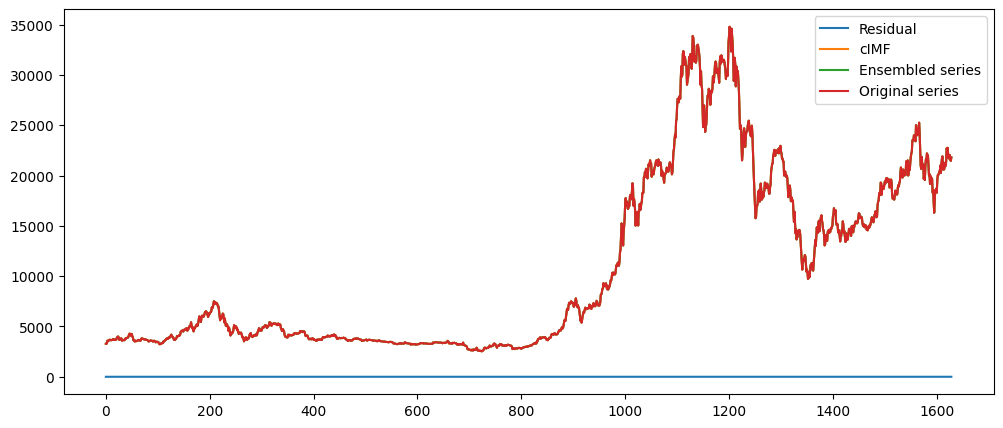

In [11]:
plt.figure(figsize=(12,5))
plt.plot(range(0,len(df)), residue)
plt.plot(range(0,len(df)), scIMF)
plt.plot(range(0,len(df)), scIMF+residue)
plt.plot(df)
plt.legend(["Residual", "cIMF", "Ensembled series", "Original series"])

plt.show()

In [12]:
# load các thư viện cần thiết
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [13]:
# Scale data to 0-1
scaler = MinMaxScaler(feature_range=(0,1))
def Scaling (data):
    IMFscale = scaler.fit_transform(np.array(data))

    return IMFscale
cIMFs_t = cIMFs.T
IMFscale = Scaling(cIMFs_t)

In [14]:
print(IMFscale.shape)

(1629, 7)


(1629, 7)
Train:  (1368, 7)
Test:  (261, 7)


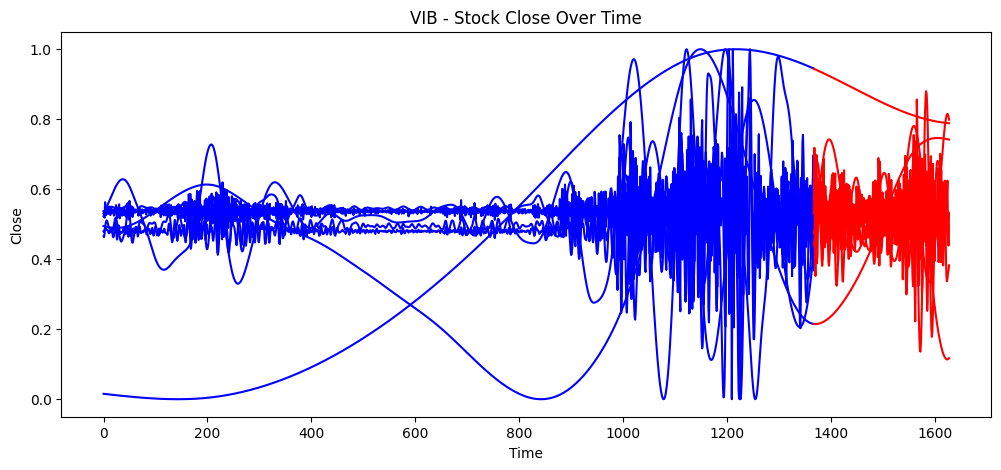

In [15]:
print(IMFscale.shape)
# Chia train test
train_size = int(0.84*IMFscale.shape[0])
test_size = int(0.16*IMFscale.shape[0])
train_data = IMFscale[:train_size]
test_data = IMFscale[train_size:]

print("Train: ", train_data.shape)
print("Test: ", test_data.shape)

# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b')
plt.plot(range(train_size-1,  train_size+test_size), test_data, linestyle='-',  color='r')

plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.show()

In [16]:
# Train X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly

trainX = []
trainY = []

n_past = 30
n_future = 1

for i in range(n_past, len(train_data) - n_future + 1):
    past_sequence = train_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = train_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    trainX.append(past_sequence)
    trainY.append(future_sequence)

trainX, trainY = np.array(trainX), np.array(trainY)
trainY = trainY.reshape(trainY.shape[0], trainY.shape[2])

print("X train: ", trainX.shape)
print("Y train: ", trainY.shape)

X train:  (1338, 30, 7)
Y train:  (1338, 7)


In [17]:
# Test X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly
testX = []
testY = []

for i in range(n_past, len(test_data) - n_future + 1):
    past_sequence = test_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = test_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    testX.append(past_sequence)
    testY.append(future_sequence)

testX, testY = np.array(testX), np.array(testY)
testY = testY.reshape(testY.shape[0], testY.shape[2])

print("X test: ", testX.shape)
print("Y test: ", testY.shape)

X test:  (231, 30, 7)
Y test:  (231, 7)


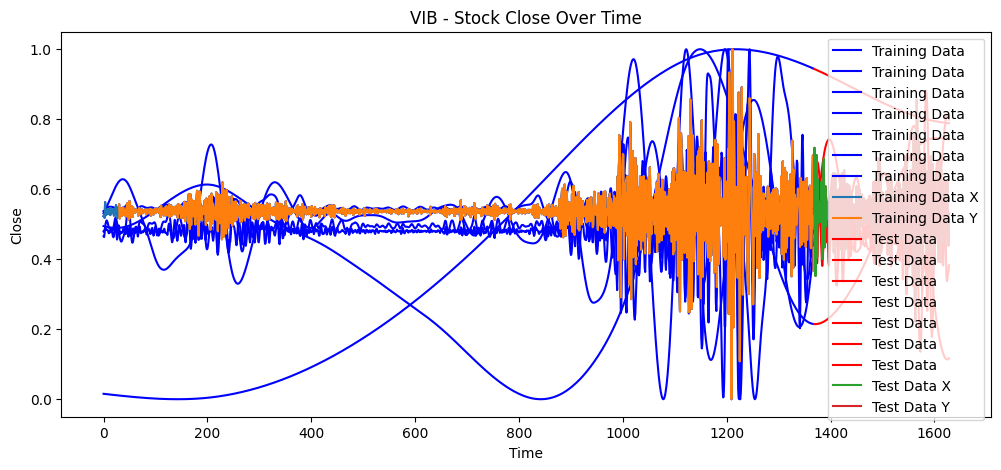

In [18]:
# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size-n_past), trainX[:,0,0], linestyle='-', label='Training Data X')
plt.plot(range(n_past,train_size), trainY[:,0], linestyle='-', label='Training Data Y')
plt.plot(range(train_size, train_size+test_size+1), test_data, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size, train_size+test_size-n_past+1), testX[:,0,0], linestyle='-',  label='Test Data X')
plt.plot(range(train_size+n_past, train_size+test_size+1), testY[:,0], linestyle='-', label='Test Data Y')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

In [35]:
# Tạo model lstm cho việc training
## kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01),
               ##bias_regularizer=l2(0.01),
model = Sequential()
model.add(LSTM(64, activation='relu',

               input_shape=(trainX.shape[1], trainX.shape[2]),

               return_sequences=True))
model.add(LSTM(20, activation='relu',

               return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainX.shape[2]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            18432     
                                                                 
 lstm_5 (LSTM)               (None, 20)                6800      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 147       
                                                                 
Total params: 25379 (99.14 KB)
Trainable params: 25379 (99.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history = model.fit(trainX, trainY,epochs = 60, batch_size = 4, validation_split = 0.1, verbose=1)

Epoch 1/60
301/301 [==============================] - 7s 16ms/step - loss: 0.0567 - val_loss: 0.0288
Epoch 2/60
301/301 [==============================] - 6s 20ms/step - loss: 0.0224 - val_loss: 0.0251
Epoch 3/60
301/301 [==============================] - 4s 15ms/step - loss: 0.0154 - val_loss: 0.0230
Epoch 4/60
301/301 [==============================] - 6s 18ms/step - loss: 0.0122 - val_loss: 0.0223
Epoch 5/60
301/301 [==============================] - 5s 18ms/step - loss: 0.0104 - val_loss: 0.0200
Epoch 6/60
301/301 [==============================] - 5s 15ms/step - loss: 0.0093 - val_loss: 0.0186
Epoch 7/60
301/301 [==============================] - 6s 20ms/step - loss: 0.0084 - val_loss: 0.0176
Epoch 8/60
301/301 [==============================] - 5s 16ms/step - loss: 0.0080 - val_loss: 0.0175
Epoch 9/60
301/301 [==============================] - 5s 15ms/step - loss: 0.0079 - val_loss: 0.0188
Epoch 10/60
301/301 [==============================] - 6s 19ms/step - loss: 0.0072 - val_lo

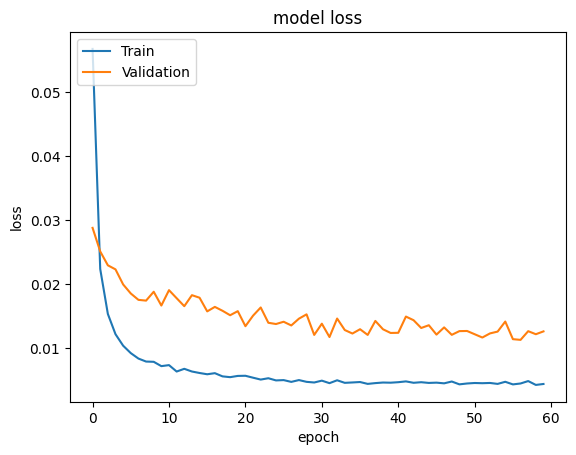

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
testY.shape

(231, 7)

In [39]:
prediction = model.predict(testX)
prediction_copies = np.repeat(prediction, train_data.shape[1], axis=-1)
print(prediction_copies.shape)
y_pred_future = scaler.inverse_transform(prediction)[:]
print(y_pred_future.shape)

8/8 [==============================] - 0s 7ms/step
(231, 49)
(231, 7)


In [40]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

In [41]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

In [42]:
train_sum = train_back.sum(axis = 1).reshape(-1, 1)
test_sum = test_back.sum(axis = 1).reshape(-1, 1)
pred_sum = y_pred_future.sum(axis=1).reshape(-1, 1)


print (train_sum.shape)
print(test_sum.shape)
print(pred_sum.shape)
print(pred_sum)

(1368, 1)
(261, 1)
(231, 1)
[[12391.799 ]
 [12229.26  ]
 [12127.336 ]
 [12448.785 ]
 [13326.883 ]
 [14116.949 ]
 [14415.498 ]
 [14198.721 ]
 [13689.568 ]
 [13241.297 ]
 [12824.668 ]
 [12507.107 ]
 [12406.346 ]
 [12415.791 ]
 [12452.219 ]
 [12390.744 ]
 [12161.077 ]
 [11750.053 ]
 [11341.412 ]
 [11610.859 ]
 [12209.254 ]
 [12931.363 ]
 [13272.687 ]
 [13255.935 ]
 [13138.932 ]
 [12780.268 ]
 [12372.99  ]
 [12085.95  ]
 [11917.003 ]
 [11682.014 ]
 [11505.91  ]
 [11514.467 ]
 [11619.471 ]
 [11722.468 ]
 [11731.295 ]
 [11673.748 ]
 [11712.018 ]
 [11799.674 ]
 [12061.301 ]
 [12313.838 ]
 [12602.95  ]
 [12718.203 ]
 [12761.926 ]
 [12710.019 ]
 [12678.145 ]
 [12686.576 ]
 [12753.135 ]
 [12850.514 ]
 [13008.27  ]
 [13177.141 ]
 [13400.385 ]
 [13645.155 ]
 [13845.374 ]
 [13927.434 ]
 [13914.117 ]
 [13923.72  ]
 [13911.903 ]
 [13833.755 ]
 [13683.755 ]
 [13506.838 ]
 [13419.912 ]
 [13420.085 ]
 [13466.238 ]
 [13481.722 ]
 [13552.739 ]
 [13655.509 ]
 [13721.8125]
 [13737.639 ]
 [13783.451 ]
 [1380

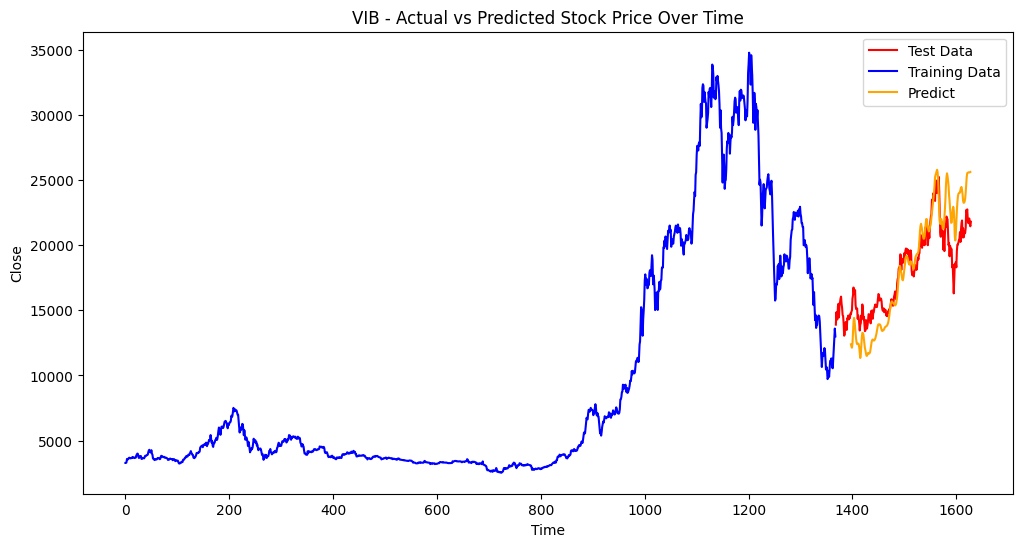

In [43]:
plt.figure(figsize=(12, 6))
n_future = 30

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# # Plot predicted values
#plt.plot( test_Date, y_pred, label='Predicted', linestyle='-',  color='b')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [44]:
n_past = 1
n_days_for_prediction= 60

#print(test_data.reshape(1,-1).T.shape)

test_for_forecast = test_data
print("Test: ", test_for_forecast.shape)

x_forecast = []
y_forecast = []

for i in range(n_days_for_prediction):
  # B1 Duyệt dữ liệu test n ngày gần nhất => bỏ vào x tạm
  x = np.array(test_for_forecast[(-15):])
  print("X shape:",x.shape)
  x = x.reshape(1, x.shape[0], x.shape[1])
  print("X reshape: ",x.shape)

  # B2 dùng predict để chạy 1 ngày
  y = model.predict(x)
  print("Y shape:", y.shape)
  # B3 thêm data ngày đó vào y_forecast, test_for_forecast và append x vào x_forecast
  #y_c = np.repeat(y, train_data.shape[1], axis=-1)
  #print("Y copied:",y_c.shape)
  y_pr = scaler.inverse_transform(y)[:]

  x_forecast.append(x)
  y_forecast.append(y_pr)
  test_for_forecast = np.append(test_for_forecast, y).reshape(-1, 7)
  print(test_for_forecast.shape)
  #test_for_forecast.append(y)
  # B4 lặp lại đến ngày thứ 60

x_forecast = np.array(x_forecast)
y_forecast = np.array(y_forecast)

Test:  (261, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 319ms/step
Y shape: (1, 7)
(262, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 22ms/step
Y shape: (1, 7)
(263, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 21ms/step
Y shape: (1, 7)
(264, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 22ms/step
Y shape: (1, 7)
(265, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 22ms/step
Y shape: (1, 7)
(266, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 23ms/step
Y shape: (1, 7)
(267, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 22ms/step
Y shape: (1, 7)
(268, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 23ms/step
Y shape: (1, 7)
(269, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==

In [45]:
print(y_forecast)

[[[   59.674625    61.091984   124.36962   3065.7454   -1956.9084
    5590.6235   18703.697   ]]

 [[   60.952656    75.08961    205.38696   3080.1628   -1955.844
    5718.0557   18829.492   ]]

 [[   62.20462     88.52252    285.4945    3077.0278   -1947.4364
    5825.1597   18981.3     ]]

 [[   63.003857    98.59153    348.47076   3054.6787   -1936.7067
    5889.3228   19119.287   ]]

 [[   63.200626   104.35184    387.9032    3012.7883   -1927.8198
    5907.1025   19218.678   ]]

 [[   62.84785    105.79122    402.35748   2956.865    -1924.0276
    5888.4736   19271.262   ]]

 [[   62.035484   103.16338    392.53107   2891.5188   -1926.9882
    5844.082    19278.627   ]]

 [[   60.967354    98.237045   368.75214   2821.5566   -1934.9333
    5788.5107   19251.379   ]]

 [[   59.836704    92.36696    338.7496    2750.179    -1948.0375
    5737.3794   19205.135   ]]

 [[   58.803463    86.78078    309.50687   2684.1394   -1964.0242
    5692.5273   19153.158   ]]

 [[   57.93465     82

In [46]:
forecast_sum = y_forecast.sum(axis = -1)
print(forecast_sum.shape)

(60, 1)


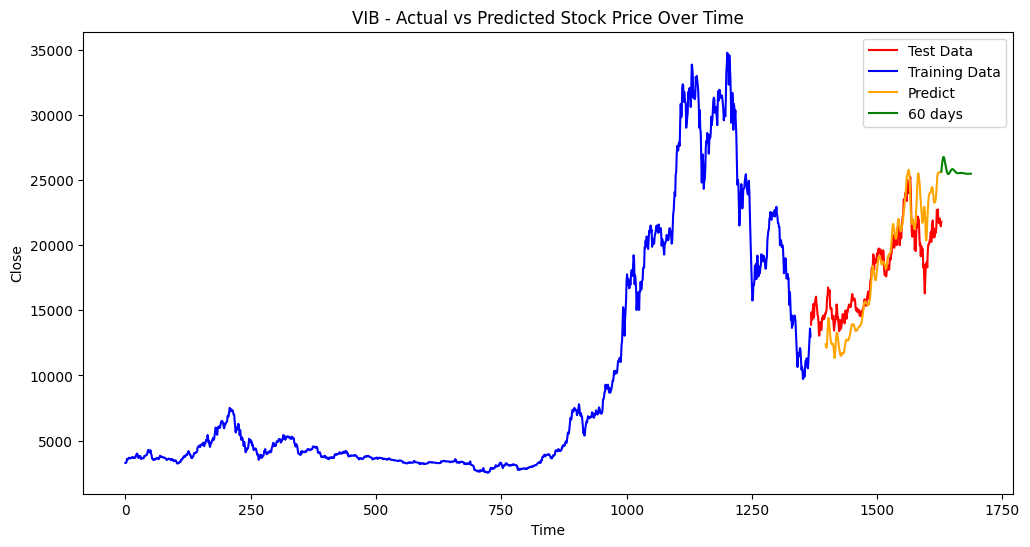

In [49]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# Plot 60 days
plt.plot(range(train_size+test_size, train_size+test_size+60), forecast_sum, linestyle='-', color='green', label='60 days')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [48]:
def RSME (data1, data2):
    return np.sqrt(np.mean((data1-data2)*(data1-data2)))
def MAE (data1, data2):
    return np.mean(np.absolute(data1-data2))
def MAPE (pred, actual):
    return np.mean(np.absolute((pred-actual)/actual))*100
def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))

print("RSME: ", RSME(pred_sum, test_sum[n_future:]))
print("MAE: ", MAE(pred_sum, test_sum[n_future:]))
print("MAPE: ", MAPE(pred_sum, test_sum[n_future:]))
print("MSLR: ", MSLE(pred_sum, test_sum[n_future:]))

RSME:  2073.139838432584
MAE:  1679.355337696158
MAPE:  9.494053085852162
MSLR:  0.013903201993564108
